# OBJEKTIF PENELUSURAN

1. Melakukan penelusuran kota yang paling sering melakukan order
2. Melakukan analisis waktu transaksi dan tren tiap bulan
3. Menganalisis hubungan review score dengan waktu transaksi

# LANGKAH 1 : Melakukan Import Modules dan Membaca Seluruh Table

In [2]:
# loading in modules
import sqlite3
import pandas as pd

# creating file path
dbfile = 'olist.db'
# Create a SQL connection to our SQLite database
con = sqlite3.connect(dbfile)

# creating cursor
cur = con.cursor()

# reading all table names
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
# here is you table list
print(table_list)

[('olist_order_customer_dataset',), ('olist_order_dataset',), ('olist_order_reviews_dataset',), ('olist_order_payments_dataset',), ('olist_order_items_dataset',), ('olist_products_dataset',), ('olist_sellers_dataset',), ('olist_geolocation_dataset',), ('product_category_name_translation',)]


# LANGKAH 2 : Memanggil Table pada Database

In [3]:
# olist_order_customer_dataset
customers = pd.read_sql_query('SELECT * FROM olist_order_customer_dataset', con)
customers.head()

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# olist_order_dataset
orders = pd.read_sql_query('SELECT * FROM olist_order_dataset', con)
orders.head()

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
# olist_order_reviews_dataset
reviews = pd.read_sql_query('SELECT * FROM olist_order_reviews_dataset', con)
reviews.head()

,index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [6]:
# olist_order_payments_dataset
payments = pd.read_sql_query('SELECT * FROM olist_order_payments_dataset', con)
payments.head()

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
# olist_order_items_dataset
items = pd.read_sql_query('SELECT * FROM olist_order_items_dataset', con)
items.head()

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
# olist_products_dataset
products = pd.read_sql_query('SELECT * FROM olist_products_dataset', con)
products.head()

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
# olist_sellers_dataset
sellers = pd.read_sql_query('SELECT * FROM olist_sellers_dataset', con)
sellers.head()

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [10]:
# olist_geolocation_dataset
geolocation = pd.read_sql_query('SELECT * FROM olist_geolocation_dataset', con)
geolocation.head()

,index,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,0,1037,-23.545621,-46.639292,sao paulo,SP
1,1,1046,-23.546081,-46.644820,sao paulo,SP
2,2,1046,-23.546129,-46.642951,sao paulo,SP
3,3,1041,-23.544392,-46.639499,sao paulo,SP
4,4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
# product_category_name_translation
name_translations = pd.read_sql_query('SELECT * FROM product_category_name_translation', con)
name_translations.head()

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor


# LANGKAH 3 : Menggabungkan Tabel untuk Mempermudah Manipulasi Data

Untuk menjawab objektif nomor 1, 
maka saya akan menggabungkan table customers dengan table orders.

In [12]:
merge_customers_orders = pd.merge(customers, orders, on= 'customer_id', how = 'outer')
merge_customers_orders.head()

,index_x,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,index_y,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,88492,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,90418,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,22557,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,32180,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,69902,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


Setelah menggabungkan table maka langkah selanjutnya adalah melakukan eksplorasi dan pemrosesan data

In [13]:
# Load table gabungan dan mengecek informasi data
merge_customers_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   index_x                        99441 non-null  int64 
 1   customer_id                    99441 non-null  object
 2   customer_unique_id             99441 non-null  object
 3   customer_zip_code_prefix       99441 non-null  int64 
 4   customer_city                  99441 non-null  object
 5   customer_state                 99441 non-null  object
 6   index_y                        99441 non-null  int64 
 7   order_id                       99441 non-null  object
 8   order_status                   99441 non-null  object
 9   order_purchase_timestamp       99441 non-null  object
 10  order_approved_at              99281 non-null  object
 11  order_delivered_carrier_date   97658 non-null  object
 12  order_delivered_customer_date  96476 non-null  object
 13  o

In [14]:
# Mengidentifikasi Missing Value
merge_customers_orders.isna().sum()

index_x                             0
customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
index_y                             0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [15]:
# Mengidentifikasi Outlier
merge_customers_orders.describe()

,index_x,customer_zip_code_prefix,index_y
count,99441.000000,99441.000000,99441.000000
mean,49720.000000,35137.474583,49720.000000
std,28706.288396,29797.938996,28706.288396
min,0.000000,1003.000000,0.000000
25%,24860.000000,11347.000000,24860.000000
50%,49720.000000,24416.000000,49720.000000
75%,74580.000000,58900.000000,74580.000000
max,99440.000000,99990.000000,99440.000000


In [16]:
# Mengidentifikasi duplikat
merge_customers_orders.duplicated(keep = False)

0        False
1        False
2        False
3        False
4        False
         ...  
99436    False
99437    False
99438    False
99439    False
99440    False
Length: 99441, dtype: bool

In [17]:
# Mengidentifikasi inkonsisten format 1
merge_customers_orders['index_x'].unique()

array([    0,     1,     2, ..., 99438, 99439, 99440], dtype=int64)

In [71]:
# Mengidentifikasi inkonsisten format 2
merge_customers_orders['customer_city'].value_counts()

sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: customer_city, Length: 4119, dtype: int64

In [19]:
# Menghitung order terbanyak berdasarkan kota
top_orders_cities = merge_customers_orders.groupby("customer_city")["order_id"].count().reset_index().sort_values("order_id", ascending = False)
top_orders_cities.head()

,customer_city,order_id
3597,sao paulo,15540
3155,rio de janeiro,6882
453,belo horizonte,2773
558,brasilia,2131
1143,curitiba,1521


<AxesSubplot:xlabel='customer_city', ylabel='order_id'>

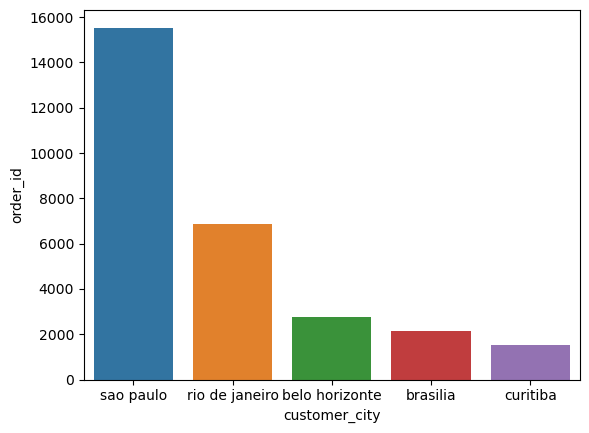

In [20]:
# visualisasi total order berdasarkan kota
import seaborn as sns
sns.barplot(data=top_orders_cities[:5], y="order_id", x="customer_city")

Untuk menjawab objektif nomor 2, maka saya akan menggunakan table orders.
(Melakukan analisis waktu transaksi dan tren tiap bulan)

In [21]:
# Load table order dan mengecek informasi data
merge_customers_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   index_x                        99441 non-null  int64 
 1   customer_id                    99441 non-null  object
 2   customer_unique_id             99441 non-null  object
 3   customer_zip_code_prefix       99441 non-null  int64 
 4   customer_city                  99441 non-null  object
 5   customer_state                 99441 non-null  object
 6   index_y                        99441 non-null  int64 
 7   order_id                       99441 non-null  object
 8   order_status                   99441 non-null  object
 9   order_purchase_timestamp       99441 non-null  object
 10  order_approved_at              99281 non-null  object
 11  order_delivered_carrier_date   97658 non-null  object
 12  order_delivered_customer_date  96476 non-null  object
 13  o

Disini saya akan menggunakan kolom order_purchase_timestamp sebagai fitur untuk menjawab objektif nomor 2, 
karena tipe data pada kolom masih berupa object maka akan dilakukan konversi tipe data menjadi date time terlebih dahulu sebelum dilakukan pemrosesan lebih lanjut

In [22]:
# Melakukan konversi tipe data dari object ke datetime
merge_customers_orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], yearfirst = True)

In [23]:
# Hasil informasi setelah dilakukan konversi tipe data
merge_customers_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index_x                        99441 non-null  int64         
 1   customer_id                    99441 non-null  object        
 2   customer_unique_id             99441 non-null  object        
 3   customer_zip_code_prefix       99441 non-null  int64         
 4   customer_city                  99441 non-null  object        
 5   customer_state                 99441 non-null  object        
 6   index_y                        99441 non-null  int64         
 7   order_id                       99441 non-null  object        
 8   order_status                   99441 non-null  object        
 9   order_purchase_timestamp       99441 non-null  datetime64[ns]
 10  order_approved_at              99281 non-null  object        
 11  order_delivered

In [72]:
# Mengekstraksi informasi bulan dari kolom order_purchase_timestamp
merge_customers_orders['month'] = merge_customers_orders['order_purchase_timestamp'].dt.month

In [73]:
#Menghitung banyaknya order setiap bulan
purchase_grouped_by_month = merge_customers_orders.groupby(merge_customers_orders['month'])['order_id'].nunique().reset_index()
purchase_grouped_by_month

,month,order_id
0,1,8069
1,2,8508
2,3,9893
3,4,9343
4,5,10573
5,6,9412
6,7,10318
7,8,10843
8,9,4305
9,10,4959


<AxesSubplot:xlabel='month', ylabel='order_id'>

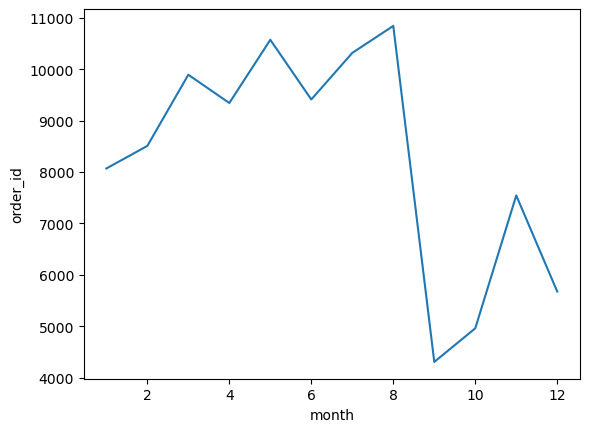

In [246]:
# plot visualisasi tren transaksi setiap bulan
sns.lineplot(data = purchase_grouped_by_month, x = 'month', y = 'order_id')

Untuk menjawab objektif nomor 3, maka saya akan menggabungkan table review_score dengan table merge_customers_orders. (Menganalisis hubungan review score dengan waktu transaksi)

In [95]:
# Pertama lakukan penggabungan table antara table order_purchase_timestamp dengan table reviews
merge_customers_orders_reviews = pd.merge(merge_customers_orders, reviews, on = 'order_id', how = 'outer')
merge_customers_orders_reviews.head()

,index_x,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,index_y,order_id,order_status,order_purchase_timestamp,...,order_estimated_delivery_date,year,month,index,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,88492,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-10-02 10:56:33,...,2017-06-05 00:00:00,2017,10,24307.0,88b8b52d46df026a9d1ad2136a59b30b,4.0,None,None,2017-05-26 00:00:00,2017-05-30 22:34:40
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,90418,29150127e6685892b6eab3eec79f59c7,delivered,2018-07-24 20:41:37,...,2018-02-06 00:00:00,2018,7,67454.0,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,None,None,2018-01-30 00:00:00,2018-02-10 22:43:29
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,22557,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-08-08 08:38:49,...,2018-06-13 00:00:00,2018,8,43730.0,5ad6695d76ee186dc473c42706984d87,5.0,None,None,2018-06-15 00:00:00,2018-06-15 12:10:59
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,32180,951670f92359f4fe4a63112aa7306eba,delivered,2017-11-18 19:28:06,...,2018-04-10 00:00:00,2017,11,71676.0,059a801bb31f6aab2266e672cab87bc5,5.0,None,None,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,69902,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-02-13 21:18:39,...,2018-08-15 00:00:00,2018,2,31650.0,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52


In [96]:
# Melakukan pengecekan informasi pada table
merge_customers_orders_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99992 entries, 0 to 99991
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index_x                        99992 non-null  int64         
 1   customer_id                    99992 non-null  object        
 2   customer_unique_id             99992 non-null  object        
 3   customer_zip_code_prefix       99992 non-null  int64         
 4   customer_city                  99992 non-null  object        
 5   customer_state                 99992 non-null  object        
 6   index_y                        99992 non-null  int64         
 7   order_id                       99992 non-null  object        
 8   order_status                   99992 non-null  object        
 9   order_purchase_timestamp       99992 non-null  datetime64[ns]
 10  order_approved_at              99831 non-null  object        
 11  order_delivered

In [97]:
# Melakukan pengecekan NaN pada table
merge_customers_orders_reviews[['order_id', 'review_score']].isna().sum()

order_id          0
review_score    768
dtype: int64

<AxesSubplot:xlabel='review_score', ylabel='Count'>

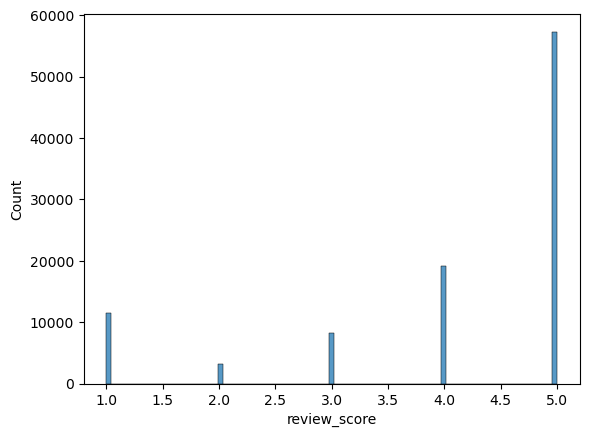

In [98]:
#visualisasi plot review_score untuk mengecek kondisi value
sns.histplot(data=merge_customers_orders_reviews,x="review_score")

Melakukan inputasi Untuk kolom review_score untuk handling missing values, karena datanya numerical discrite akan diganti dengan nilai modus

In [99]:
# Mencari nilai modus dari kolom review_score
mod_revies_score = merge_customers_orders_reviews["review_score"].mode()[0]
# Menginput NaN pada kolom review_score
merge_customers_orders_reviews["review_score"] = merge_customers_orders_reviews["review_score"].fillna(mod_revies_score)

In [100]:
# Cek NaN sekali lagi
merge_customers_orders_reviews[['order_id', 'review_score']].isna().sum()

order_id        0
review_score    0
dtype: int64

In [105]:
#Menghitung nilai rata-rata review_score setiap bulan
review_score_grouped_by_months = merge_customers_orders_reviews.groupby(merge_customers_orders_reviews['month'])['review_score'].mean().reset_index()
review_score_grouped_by_months

,month,review_score
0,1,4.099926
1,2,4.095138
2,3,4.082755
3,4,4.093311
4,5,4.106431
5,6,4.067272
6,7,4.114644
7,8,4.070727
8,9,4.077492
9,10,4.116763


<AxesSubplot:xlabel='month', ylabel='review_score'>

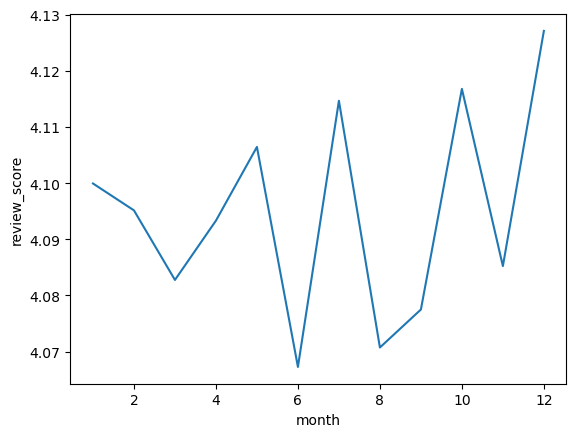

In [107]:
# plot visualisasi tren review_score setiap bulan
sns.lineplot(data = review_score_grouped_by_months, x = 'month', y = 'review_score')